In [1]:
# %load /home/jonathan/.ipython/profile_default/startup/startup-01.py
# start up settings for ipython
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os, sys

plt.style.use('ggplot')
plt.rcParams['font.size'] = 15.0
plt.rcParams['axes.labelsize'] = 15.0
plt.rcParams['xtick.labelsize'] = 15.0
plt.rcParams['ytick.labelsize'] = 15.0
plt.rcParams['legend.fontsize'] = 15.0

%matplotlib inline

# set the max column width
pd.options.display.max_colwidth = 1000


In [167]:
tender_df = pd.read_csv('../../data/processed14Nov/tsmall.csv')
tprod_df = pd.read_csv('../../data/processed14Nov/tsprod.csv')

### Deserted tenders

In [3]:
tdesert_df = tender_df[
    (tender_df['Estado'].str.lower().str.startswith('desier'))
]
tdesert_tids = tdesert_df['CodigoExterno'].values
tdprod_df = tprod_df[(tprod_df['CodigoExterno'].isin(tdesert_tids))]
desert_df = tdprod_df.merge(tdesert_df, on='CodigoExterno')

In [4]:
excl_org_code = [7367]

tdesert_df[
    ~(tdesert_df['CompradorCodigoOrganismo'].isin(excl_org_code))
][['CodigoExterno', 'Nombre', 'FechasFechaPublicacion', 'FechasFechaCierre']].sort_values('FechasFechaPublicacion')

,CodigoExterno,Nombre,FechasFechaPublicacion,FechasFechaCierre
200,1403-104-LE16,REPARTO DE PAN MENSUALl Y FLETES EXTRAS,2016-11-02T13:43:23.34,2016-11-16T11:08:00
5158,729-460-L116,REPUESTOS TREN 2 7242 MVV,2016-11-02T14:55:00,2016-11-25T16:49:00
5017,633-34-LE16,Diseno y Confeccion Corporeos Forestin,2016-11-02T15:13:02.763,2016-11-14T15:00:00
2036,2408-1194-L116,CONTRATO SUMNISTRO ORNAMENTACION,2016-11-02T15:18:40.123,2016-11-09T14:00:00
1158,1989-99-L116,Examen Ocupacional a Personal del Aeropuerto Diego Aracena,2016-11-02T15:23:50.373,2016-11-10T09:00:00
1995,2401-442-L116,MOCHILAS PROYECTO INFANCIA,2016-11-02T15:33:25.95,2016-11-08T12:01:00
1606,2252-200-LE16,DESNATURALIZACION DE PLACAS PARA FISH,2016-11-02T15:47:00.757,2016-11-14T15:00:00
4344,4642-164-L116,EQUPAMIENTO MEDICO UCI ADULTO DEL HOSPITAL DE CARABINEROS,2016-11-02T16:27:37.627,2016-11-09T17:00:00
2993,3020-35-LE16,Asistencia Tecnica para el Fortalecimiento del PRBIPE de Lota,2016-11-02T16:43:42.75,2016-11-17T11:30:00
4970,608-710-LQ16,BAJADAS DE ALIMENTACION Y EQUIPOS DE INFUSION EN COMODATO,2016-11-02T16:47:00,2016-12-02T14:00:00


In [5]:
td = tdesert_df[
    (tdesert_df['CodigoExterno']=='4858-252-L116')
]

In [6]:
tender_df[
#    (tender_df['Nombre']==td['Nombre'].values[0])&
    (tender_df['CompradorCodigoOrganismo']==td['CompradorCodigoOrganismo'].values[0])&
    (tender_df['Nombre']==td['Nombre'].values[0])
].sort_values('FechasFechaPublicacion')[['Estado', 'FechasFechaPublicacion', 'Nombre', 'CompradorNombreOrganismo', 
   'CompradorCodigoOrganismo', 'AdjudicacionUrlActa', 'CodigoExterno']]

,Estado,FechasFechaPublicacion,Nombre,CompradorNombreOrganismo,CompradorCodigoOrganismo,AdjudicacionUrlActa,CodigoExterno
4472,Desierta o art 3 o 9 Ley 19 886,2016-11-03T10:23:00,Adquisicion para insumos de Plateria Mapuche,Ilustre Municipalidad de Tirua,183037,http://www.mercadopublico.cl/Procurement/Modules/RFB/StepsProcessAward/PreviewAwardAct.aspx?qs=qLL7S6nvqW9KtaMIYhIKeaMaZW06HimjZ/4Cd1xHeIg=,4858-252-L116


In [111]:
excl_org_code = [7326, 87901]

deserted = tdesert_df[
    ~(tdesert_df['CompradorCodigoOrganismo'].isin(excl_org_code))&
    ~(tdesert_df['CompradorNombreOrganismo'].str.lower().str.startswith('hospital'))&
    ~(tdesert_df['CompradorNombreOrganismo'].str.lower().str.contains('salud'))
][['CodigoExterno', 'Nombre', 'FechasFechaPublicacion', 'FechasFechaCierre', 'CompradorCodigoOrganismo']].sort_values('FechasFechaPublicacion')

similar_df = pd.DataFrame()
checked = list()
for td in deserted.itertuples():
    if [td.CompradorCodigoOrganismo, td.Nombre] in checked:
        continue
    checked.append([td.CompradorCodigoOrganismo, td.Nombre])
    similar = tender_df[
        (tender_df['CompradorCodigoOrganismo']==td.CompradorCodigoOrganismo)&
        (tender_df['Nombre']==td.Nombre)
    ].sort_values('FechasFechaPublicacion')[['Estado', 'FechasFechaPublicacion', 'FechasFechaCierre', 'Nombre',
                                             'CompradorNombreOrganismo', 'CompradorCodigoOrganismo', 'AdjudicacionUrlActa', 'CodigoExterno']]
    if similar_df.empty:
        similar_df = similar
    else:
        similar_df = pd.concat([similar_df, similar], axis=0)
    

In [112]:
trace_spec = similar_df.groupby('Nombre').size()
trace_spec = trace_spec[trace_spec > 1].index.values

trace_df = similar_df[(similar_df['Nombre'].isin(trace_spec))]

### Create feature of trace length

In [133]:
def valid_dates(group, tids):
    # check dates
    last = None
    for tid in tids:
        if last == None:
            last = group[(group['CodigoExterno']==tid)][['FechasFechaPublicacion', 'FechasFechaCierre']].values[0]
        else:
            # check date
            now = group[(group['CodigoExterno']==tid)][['FechasFechaPublicacion', 'FechasFechaCierre']].values[0]
            if pd.to_datetime(now[0]) < pd.to_datetime(last[1]):
                # the publication date is smaller than the close date of the last tender
                return False
            last = now
    return True

def valid_tprods(group, tids):
    prod_dict = dict()
    for tid in tids:
        tprods = tprod_df[(tprod_df['CodigoExterno']==tid)]['CodigoProducto'].values
        tprods.sort()
        prod_dict[tid] = tprods
    # zip them
    for item_tuple in zip(*list(prod_dict.values())):
        if len(set(item_tuple)) > 1:
            return False
    return True

In [134]:
non_comply = list()
for name, group in trace_df.groupby('Nombre'):
    tids = group['CodigoExterno'].values
    # check dates
    if not valid_dates(group, tids):
        non_comply.append(tids)
        continue
    # check products
    if not valid_tprods(group, tids):
        non_comply.append(tids)
        continue

/home/jonathan/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:5: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.


In [135]:
non_comply

[array(['4011-64-L116', '4011-66-L116'], dtype=object),
 array(['3614-34-L116', '3614-36-L116'], dtype=object),
 array(['3086-53-LE16', '3086-67-LE16'], dtype=object),
 array(['2562-33-LQ16', '2562-34-LQ16'], dtype=object),
 array(['4457-105-L116', '4457-107-L116'], dtype=object),
 array(['5215-718-L116', '5215-725-L116'], dtype=object),
 array(['3017-829-L116', '3017-897-L116'], dtype=object),
 array(['3017-728-L116', '3017-825-L116', '3017-826-L116'], dtype=object),
 array(['3017-907-L116', '3017-908-L116'], dtype=object),
 array(['4484-53-LE16', '4484-59-LE16'], dtype=object),
 array(['2923-84-L116', '2923-89-L116'], dtype=object),
 array(['2961-1053-L116', '2961-1055-L116'], dtype=object)]

In [143]:
trace_df[(trace_df['CodigoExterno']=='2961-1055-L116')]

,Estado,FechasFechaPublicacion,FechasFechaCierre,Nombre,CompradorNombreOrganismo,CompradorCodigoOrganismo,AdjudicacionUrlActa,CodigoExterno
2856,Desierta o art 3 o 9 Ley 19 886,2016-11-23T19:25:23.22,2016-11-29T15:00:00,material de oficina,ILUSTRE MUNICIPALIDAD DE LA GRANJA,112097,http://www.mercadopublico.cl/Procurement/Modules/RFB/StepsProcessAward/PreviewAwardAct.aspx?qs=psY1gXPFomrWMJiuHGF6bxZrsK725QV6H/tpl7fPtMI=,2961-1055-L116


In [152]:
import functools as fcts
non_comply = fcts.reduce(lambda x, y: np.concatenate((x, y)), non_comply)

In [155]:
non_comply
trace_df = trace_df[~(trace_df['CodigoExterno'].isin(non_comply))]

array(['4011-64-L116', '4011-66-L116', '3614-34-L116', '3614-36-L116',
       '3086-53-LE16', '3086-67-LE16', '2562-33-LQ16', '2562-34-LQ16',
       '4457-105-L116', '4457-107-L116', '5215-718-L116', '5215-725-L116',
       '3017-829-L116', '3017-897-L116', '3017-728-L116', '3017-825-L116',
       '3017-826-L116', '3017-907-L116', '3017-908-L116', '4484-53-LE16',
       '4484-59-LE16', '2923-84-L116', '2923-89-L116', '2961-1053-L116',
       '2961-1055-L116'], dtype=object)

In [169]:
trace_df.groupby('Nombre').size()

Nombre
ADQ DE ENTRADAS Y ALIMENTACION PARQUE ESC F 933                                     2
ADQ MATERIALES HABILITACION BOX DENTAL DE LICEO A 61 OBRAS                          2
ADQ VESTUARIO DE ZUMBA PARA ESC D 953 SEP                                           2
ADQUISICION DE DISPENSADOR Y SUMINISTRO DE BOTELLON CFLL                            2
ADQUISICION DE LIBROS CUENTOS Y OTROS PARA SALA CUNA Y JARDIN INFANTIL DE VIUDAS    2
ADQUISICION DE PASAJES TERRESTRES BASE IM TUMBES                                    2
ADQUISICON DE PREMIOS ESPECIALES Y SET DE MEDALLAS                                  2
ARTICULOS PARA CAPITANIA DE PUERTO DE HUASCO                                        2
Adquirir Seguros Gobernacion Provincial de Aysen                                    2
COCTAIL Y CAFE BREAK                                                                2
CONTRATO SUMNISTRO ORNAMENTACION                                                    2
CORTINAS DIR ABASTECIMIENTO                    

In [170]:
trace_df[
    (trace_df['Nombre']=='PTR N 184 INSUMOS ORTOPEDICOS KINESIOLOGIA CESFAM')
]

,Estado,FechasFechaPublicacion,FechasFechaCierre,Nombre,CompradorNombreOrganismo,CompradorCodigoOrganismo,AdjudicacionUrlActa,CodigoExterno
2476,Desierta o art 3 o 9 Ley 19 886,2016-11-10T12:15:06.593,2016-11-16T13:43:00,PTR N 184 INSUMOS ORTOPEDICOS KINESIOLOGIA CESFAM,MUNICIPALIDAD DE VITACURA,98462,http://www.mercadopublico.cl/Procurement/Modules/RFB/StepsProcessAward/PreviewAwardAct.aspx?qs=vHovE42NwMKYGg73juB5vtkfsX04U0GsVq8n+mi7SCQ=,2669-176-L116
2489,Desierta o art 3 o 9 Ley 19 886,2016-11-22T16:54:32.827,2016-11-28T18:48:00,PTR N 184 INSUMOS ORTOPEDICOS KINESIOLOGIA CESFAM,MUNICIPALIDAD DE VITACURA,98462,http://www.mercadopublico.cl/Procurement/Modules/RFB/StepsProcessAward/PreviewAwardAct.aspx?qs=MXeuY21nz3osvps84Y6IB8ovJplTcez6VoWRrilGgKs=,2669-193-L116
2494,Adjudicada,2016-11-29T10:03:28.253,2016-12-05T15:52:00,PTR N 184 INSUMOS ORTOPEDICOS KINESIOLOGIA CESFAM,MUNICIPALIDAD DE VITACURA,98462,http://www.mercadopublico.cl/Procurement/Modules/RFB/StepsProcessAward/PreviewAwardAct.aspx?qs=21VhbvbcVdpSbvtKZIhsdFMsWqWYDxB3reD0hsXKNkw=,2669-199-L116


### Product types

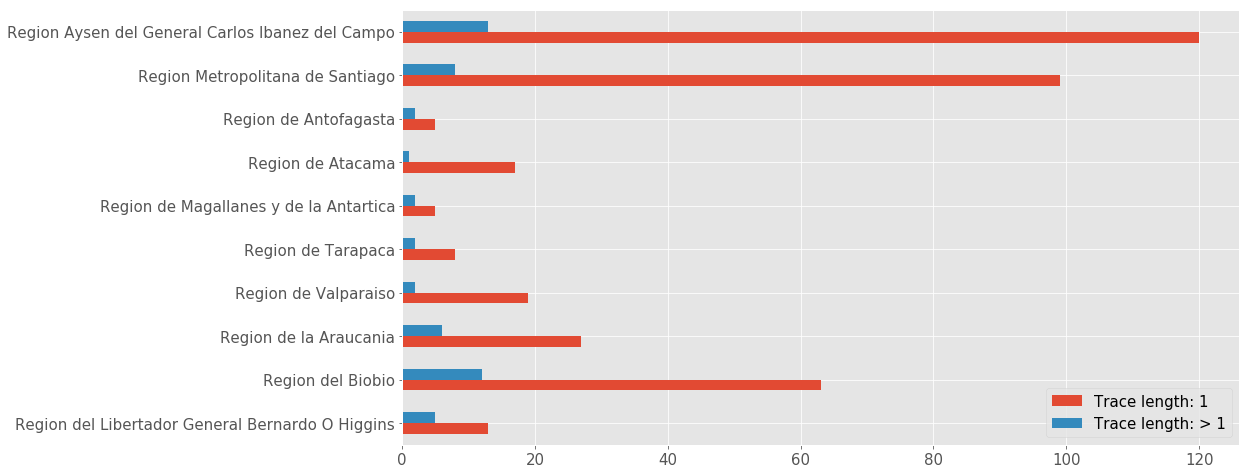

In [206]:
grouped_before = tender_df[(tender_df['CodigoExterno'].isin(deserted['CodigoExterno']))].groupby('CompradorRegionUnidad').size()
grouped_after = tender_df[(tender_df['CodigoExterno'].isin(trace_df['CodigoExterno']))].groupby('CompradorRegionUnidad').size()

grouped_before = grouped_before.to_frame().reset_index()
grouped_after = grouped_after.to_frame().reset_index()
grouped = grouped_before.merge(grouped_after, on='CompradorRegionUnidad')
grouped.columns = ['CompradorRegionUnidad', 'Trace length: 1', 'Trace length: > 1']
grouped.sort_values('CompradorRegionUnidad', inplace=True, ascending=False)

fig, ax = plt.subplots(figsize=(15, 8))
grouped.plot(kind='barh', ax=ax);
ax.set_yticklabels(grouped['CompradorRegionUnidad']);

In [181]:
trace_prod_df = tprod_df[(tprod_df['CodigoExterno'].isin(trace_df['CodigoExterno']))]

print(trace_prod_df.shape[0])

# fig, ax = plt.subplots(figsize=(40, 100))
trace_prod_df.groupby('Compra').size().sort_values(ascending=False)

272


NombreProducto
Servicios de salud o seguridad ocupacional                                             16
Bandas para ejercicios de resistencia masilla o tubos para rehabilitacion o terapia    15
Tablero de particulas                                                                  10
Servicios de autobuses regulares recorridos fijos o servicios programados               8
Seguros para casas o departamentos                                                      8
Puertas de metal                                                                        8
Figuras de goma Eva                                                                     6
Pelotas o accesorios terapeuticos                                                       6
Sets de electrodos de estimulacion muscular                                             6
Vendas o vendajes para uso general                                                      6
Enchufes electricos                                                                  